<a href="https://colab.research.google.com/github/sunkusaipurnima/DSML/blob/main/EDA/Netflix-CaseStudy/srcNetflix_EDA_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Loading Netflix Dataset**

In [ ]:
netflix_data= pd.read_csv('netflix.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Understanding the Data**

In [ ]:
#Finding the shape, size, data types , missing values etc

netflix_data.shape

(8807, 12)

Observation: Dataset has 8807 records/rows and 12 columns.

In [ ]:
netflix_data.size # size gives total number of elements in the dataset/dataframe

105684

In [ ]:
# info method gives the details of the dataframe like index range ,column names,
# non-null value count and data type

netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Getting statistics of numerical columns in the dataframe

netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Observation: Dataset has data from the year 1925 to the year 2021 , i.e 96 years of data

In [ ]:
#Finding the unique values in the dataset

netflix_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Data Preperation


1.   Unnesting the columns that have multiple values

2.   Finding null/missing values and filling them

3.   Data type conversions

4.   Renaming columns









In [ ]:
# Checking for duplicate records
netflix_data.duplicated().sum()

0

Observation: There are no duplicate records

In [ ]:
#Finding null/missing values

missing_values=pd.Series(netflix_data.isna().sum())
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
missing_values_percentage= pd.Series((netflix_data.isna().sum()/len(netflix_data))*100)
missing_values_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
# Missing values dataframe
missing_df=pd.concat([missing_values,missing_values_percentage],axis=1,keys=['Total','Percentage'])
missing_df

,Total,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


Observation: Netflix dataset has almost 30% of director column has null values followed by cast and country

In [ ]:
netflix_data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Observation: Rating has values in min , that should be filled in duration

In [ ]:
# forward filling rating values to duration where valid observation is given

ind=netflix_data[netflix_data['duration'].isna()].index
ind

Index([5541, 5794, 5813], dtype='int64')

In [ ]:
netflix_data.loc[ind]= netflix_data.loc[ind].fillna(method='ffill',axis=1)
netflix_data.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
netflix_data.loc[ind,'rating']='Not Avaliable'
netflix_data.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Avaliable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Avaliable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Avaliable,66 min,Movies,The comic puts his trademark hilarious/thought...


**Filling missing values **

In [ ]:
netflix_data['director'] = netflix_data['director'].fillna('Unspecified')
netflix_data['cast'] = netflix_data['cast'].fillna('Unknown')
netflix_data['country'] = netflix_data['country'].fillna(netflix_data['country'].mode()[0])
netflix_data['date_added'] = netflix_data['date_added'].fillna(netflix_data['date_added'].mode()[0])
netflix_data['duration']= netflix_data['duration'].fillna(netflix_data['duration'].mode()[0])
netflix_data['rating'] = netflix_data['rating'].fillna('Not Available')


In [ ]:
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Copying the dataset before cleaning
netflix_original=netflix_data.copy()
netflix_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Columns director, cast, listend_in have multiple values seperated by comma

#unnesting the cast column and considering only the main actor for the analasys

netflix_data['cast']=netflix_data['cast'].str.split(",").str[0]

#Renaming the cast to "main_actor"

netflix_data.rename(columns={'cast':'main_actor'},inplace=True)
netflix_data.head()

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#unnesting director column

netflix_data['director']=netflix_data['director'].str.split(",")
netflix_data=netflix_data.explode('director')
netflix_data.head(20)

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [ ]:
#unnesting listed_in column

netflix_data['listed_in']=netflix_data['listed_in'].str.split(",")
netflix_data=netflix_data.explode('listed_in')
netflix_data.head(20)

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,International TV Shows,To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,TV Action & Adventure,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,Reality TV,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


In [ ]:
#unnesting country column

netflix_data['country']=netflix_data['country'].str.split(",")
new=netflix_data.explode('country')


In [ ]:
netflix_data=new
netflix_data.head()

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
#Replacing show_id values with int values instead of s1 .. etc

netflix_data['show_id']=netflix_data['show_id'].str.replace('s','')
netflix_data.head()

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
# reset index after unnesting different columns
netflix_data.reset_index()

,index,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,listed_in,description
0,0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,8805,8806,Movie,Zoom,Peter Hewitt,Tim Allen,United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
25896,8805,8806,Movie,Zoom,Peter Hewitt,Tim Allen,United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
25897,8806,8807,Movie,Zubaan,Mozez Singh,Vicky Kaushal,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
25898,8806,8807,Movie,Zubaan,Mozez Singh,Vicky Kaushal,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
# Renaming listed_in column to genre

netflix_data.rename(columns={'listed_in':'genre'},inplace=True)
netflix_data.head()

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
main_actor      object
country         object
date_added      object
release_year    object
rating          object
duration        object
genre           object
description     object
dtype: object

In [ ]:
# stripping the spaces for the date_added column values

netflix_data['date_added']=netflix_data['date_added'].str.strip()


In [ ]:
# Converting object to datetime for the column date_added
date_format = "%B %d, %Y"

netflix_data['date_added']=pd.to_datetime(netflix_data['date_added'],format=date_format)

netflix_data.head()

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
# Adding columns Year_added and month_added based on the date_added column

netflix_data['year_added']=netflix_data['date_added'].dt.year
netflix_data['month_added']=netflix_data['date_added'].dt.month
netflix_data.head()

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9
2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9


**Exploratory Analysis and Visualization**

** Total no of titles uploaded on Netflix**

In [ ]:
netflix_original['show_id'].count()

8807

Observation: Out Dataset has a total of 8807 shows uploaded

**Percentage of show types uploaded on Netflix**

In [ ]:
type_count=netflix_original['type'].value_counts().reset_index()

In [ ]:
type_count.columns=['Type','Number of Titles']
type_count

,Type,Number of Titles
0,Movie,6131
1,TV Show,2676


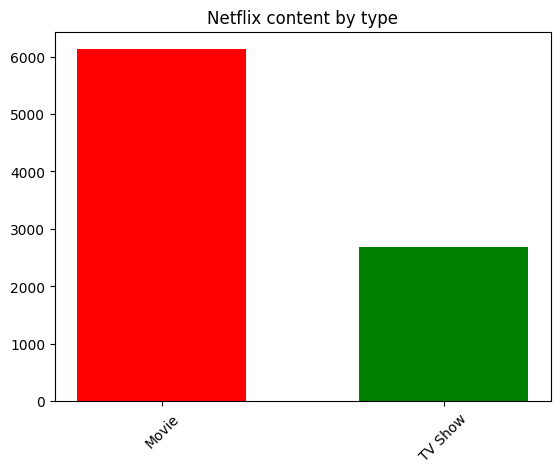

In [ ]:

x_bar=type_count['Type']
y_bar=type_count['Number of Titles']

plt.bar(x_bar,y_bar,color=['r','g'],width=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.title("Netflix content by type")
plt.ylabel='Number of Titles'
plt.show()

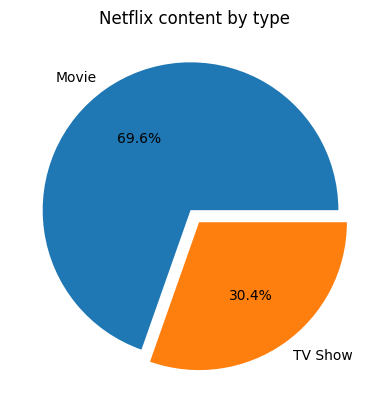

In [ ]:
plt.title('Netflix content by type')
plt.pie(netflix_original['type'].value_counts(),labels=netflix_original['type'].value_counts().index,explode=(0.05,0.05),autopct='%.1f%%')
plt.show()

In [ ]:
genre_counts=netflix_data['genre'].value_counts()
genre_counts

genre
 International Movies        3689
Dramas                       2313
Comedies                     1494
Action & Adventure           1305
Documentaries                1292
                             ... 
Spanish-Language TV Shows       3
Romantic Movies                 3
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64

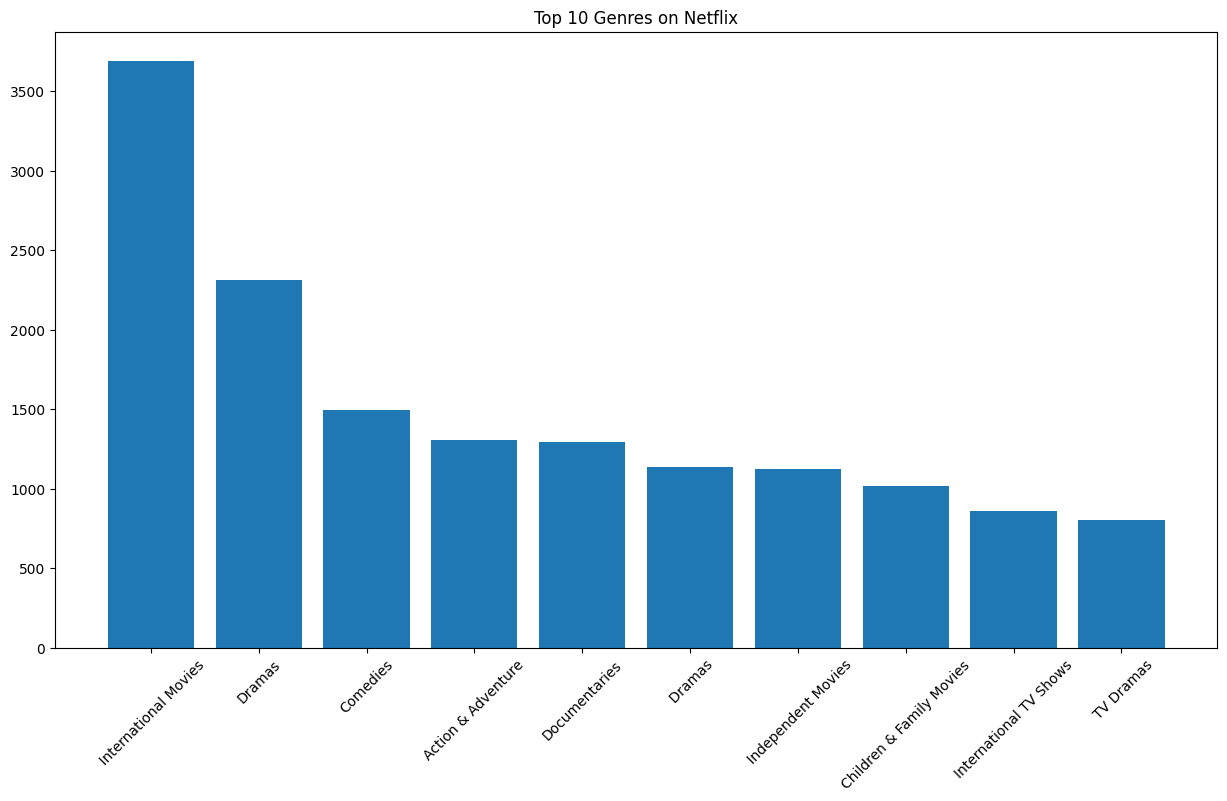

In [ ]:
plt.figure(figsize=(15,8))
x_bar=genre_counts.index[:10]
y_bar=genre_counts[:10]
plt.bar(x_bar,y_bar)
plt.xticks(rotation=45, fontsize=10)
plt.title("Top 10 Genres on Netflix")
plt.show()

In [ ]:
netflix_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_original['date_added']=netflix_original['date_added'].str.strip()
netflix_original['date_added']=pd.to_datetime(netflix_original['date_added'],format=date_format)
netflix_original['year_added']=netflix_original['date_added'].dt.year
netflix_original['month_added']=netflix_original['date_added'].dt.month


In [ ]:
netflix_original['year_added'].value_counts()

year_added
2019    2016
2020    1889
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

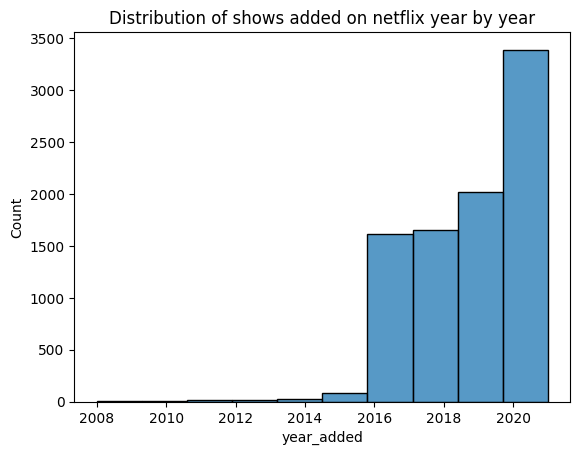

In [ ]:
sns.histplot(netflix_original['year_added'], bins=10)
plt.title("Distribution of shows added on netflix year by year")
plt.show()

Observation: The curve seems to be left skewed , indicating shows were added more from the year 2016 due to popularity of OTT platforms on internet.

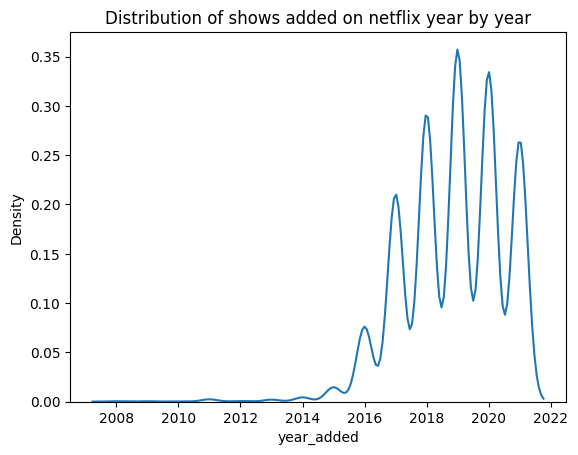

In [ ]:
# KDE plot to show more interpretable data
sns.kdeplot(netflix_original['year_added'])
plt.title("Distribution of shows added on netflix year by year")
plt.show()

In [ ]:
netflix_data.head()
netflix_data['country']=netflix_data['country'].str.strip() #stipping off spaces in country column

In [ ]:
country_data= netflix_data.set_index('country')
country_data.head()

,show_id,type,title,director,main_actor,date_added,release_year,rating,duration,genre,description,year_added,month_added
country,,,,,,,,,,,,,
United States,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
South Africa,2,TV Show,Blood & Water,Unspecified,Ama Qamata,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
South Africa,2,TV Show,Blood & Water,Unspecified,Ama Qamata,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9
South Africa,2,TV Show,Blood & Water,Unspecified,Ama Qamata,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9
United States,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9


In [ ]:
country_data=netflix_data.groupby('country').aggregate({'title':'count'}).sort_values(by='title',ascending=False)

country_data.reset_index(inplace=True)
country_data

,country,title
0,United States,9289
1,India,2999
2,United Kingdom,1880
3,France,1042
4,Canada,980
...,...,...
118,Bahamas,1
119,Uganda,1
120,Somalia,1
121,Nicaragua,1


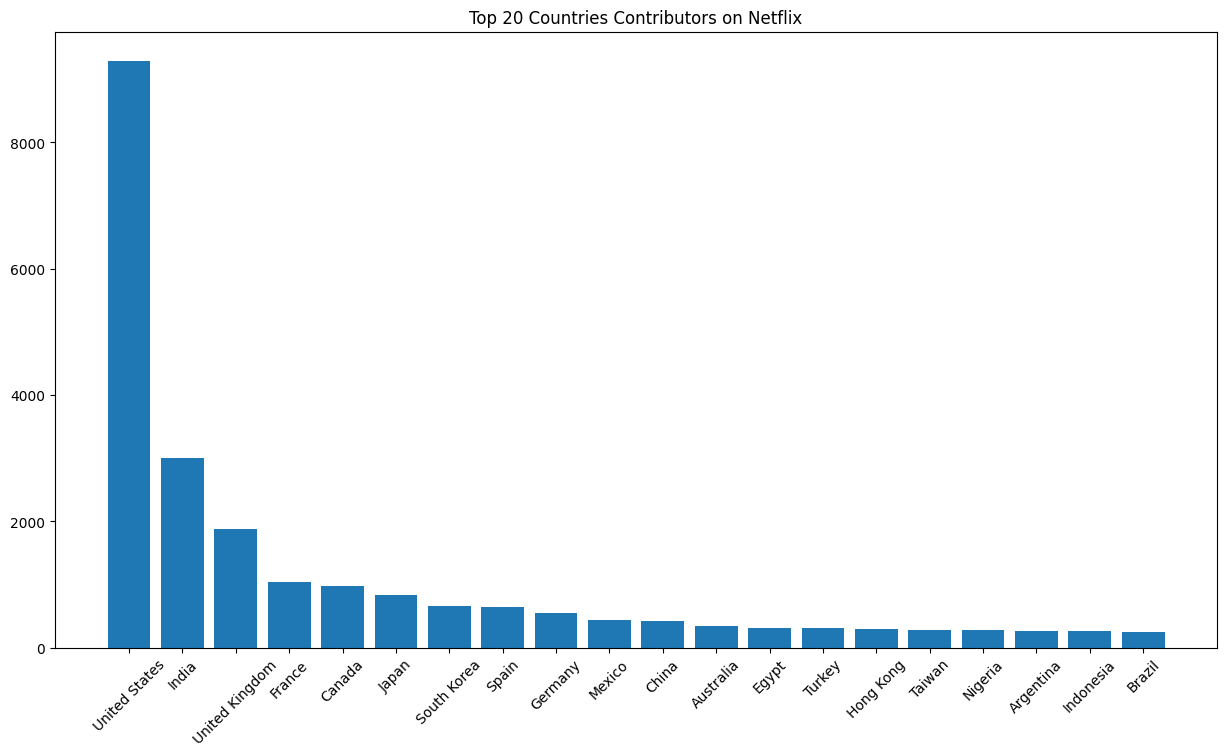

In [ ]:
plt.figure(figsize=(15,8))
x_bar=country_data['country'][:20]
y_bar=country_data['title'][:20]
plt.bar(x_bar,y_bar)
plt.xticks(rotation=45, fontsize=10)
plt.title("Top 20 Countries Contributors on Netflix")
plt.show()

In [ ]:
year_count=netflix_original.groupby('year_added').aggregate({'title':'count'}).sort_values(by='title',ascending=False)
year_count.reset_index(inplace=True)
year_count


,year_added,title
0,2019,2016
1,2020,1889
2,2018,1649
3,2021,1498
4,2017,1188
5,2016,429
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [ ]:
type_count=netflix_original.groupby(['year_added','type']).aggregate({'title':'count'})
type_count.reset_index(inplace=True)
type_count

,year_added,type,title
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


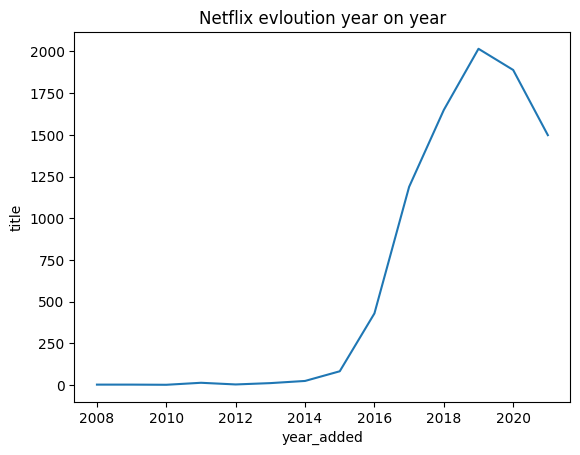

In [ ]:
sns.lineplot(data=year_count,x=year_count['year_added'],y=year_count['title'])
plt.title("Netflix evloution year on year")
plt.show()

<Axes: xlabel='year_added', ylabel='title'>

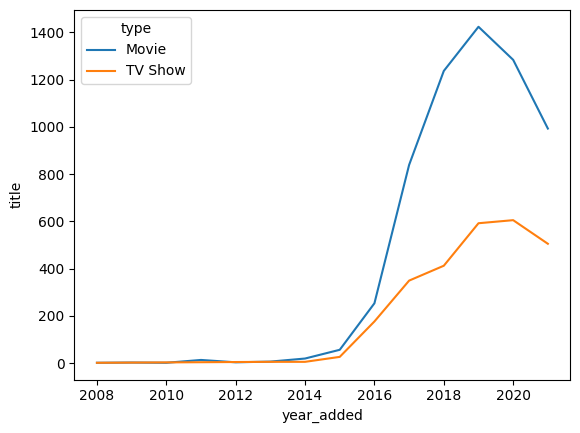

In [ ]:
# @title Average Movies vs TV Shows added per year

sns.lineplot(x = 'year_added', y = 'title', hue = 'type', data = type_count)

In [ ]:
rating_count=netflix_original['rating'].value_counts()
rating_count=pd.DataFrame(rating_count)
rating_count.reset_index()
top_rated=rating_count.iloc[:10]
top_rated.reset_index(inplace=True)
top_rated

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


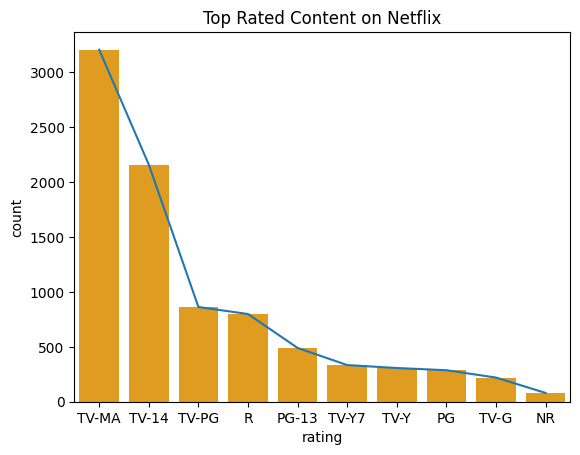

In [ ]:

sns.lineplot(x = 'rating', y = 'count',  data = top_rated)
sns.barplot(data=top_rated, x="rating", y="count",color='orange')
plt.title('Top Rated Content on Netflix')
plt.show()

In [ ]:
#Show top 10 director, who gave the highest number of TV shows & Movies to Netflix?
top_directors=netflix_data[netflix_data['director']!="Unspecified"]['director'].value_counts().reset_index()[:10]
top_directors


,director,count
0,Youssef Chahine,46
1,Cathy Garcia-Molina,37
2,Martin Scorsese,36
3,Lars von Trier,33
4,Steven Spielberg,32
5,Olivier Assayas,30
6,Tom Hooper,30
7,Suhas Kadav,29
8,Don Michael Paul,29
9,Johnnie To,28


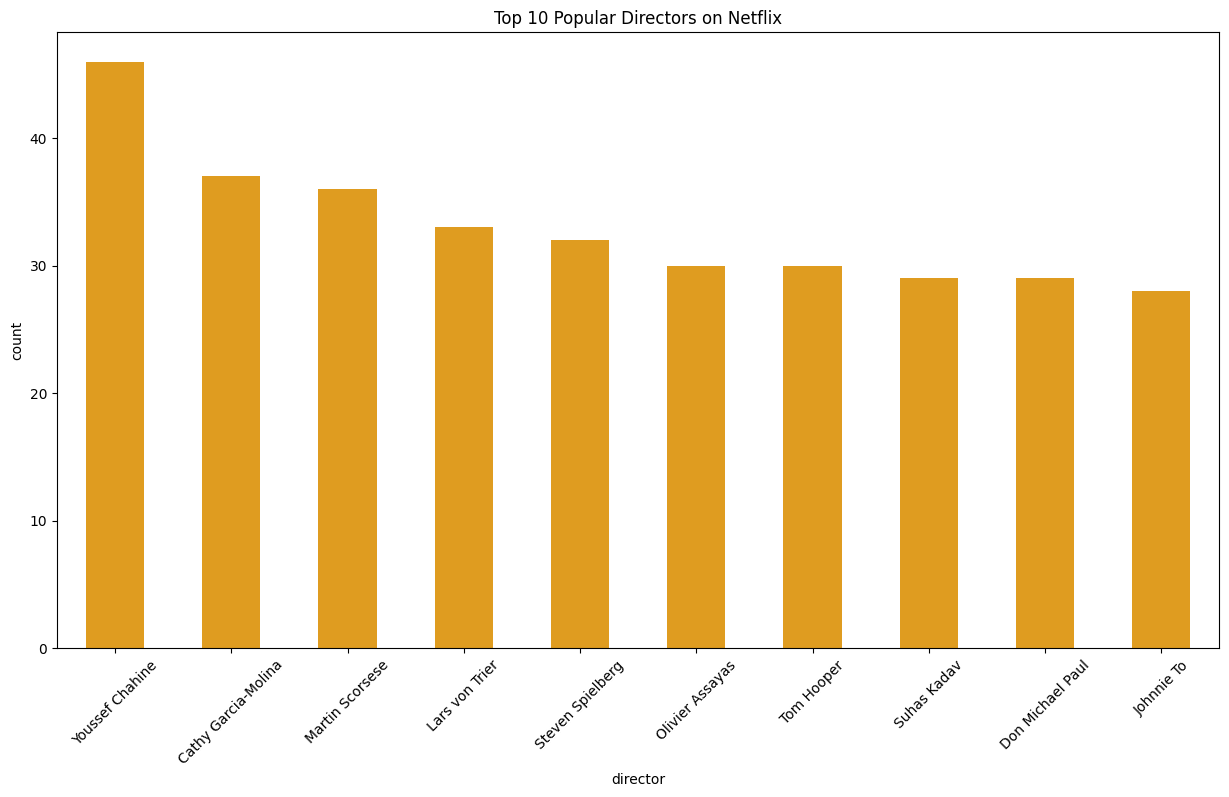

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_directors, x="director", y="count",color='orange',width=0.5)
plt.width=0.5
plt.xlabel='Director'
plt.ylabel='Number of Shows'
plt.xticks(rotation=45, fontsize=10)
plt.title('Top 10 Popular Directors on Netflix')
plt.show()

In [ ]:
top_actors=netflix_data[netflix_data['main_actor']!="Unknown"]['main_actor'].value_counts().reset_index()[:10]
top_actors

,main_actor,count
0,Liam Neeson,120
1,David Attenborough,103
2,Shah Rukh Khan,77
3,Akshay Kumar,73
4,Andy McAvin,72
5,Donnie Yen,62
6,Amitabh Bachchan,55
7,Tom Hanks,48
8,Anil Kapoor,44
9,Nicolas Cage,42


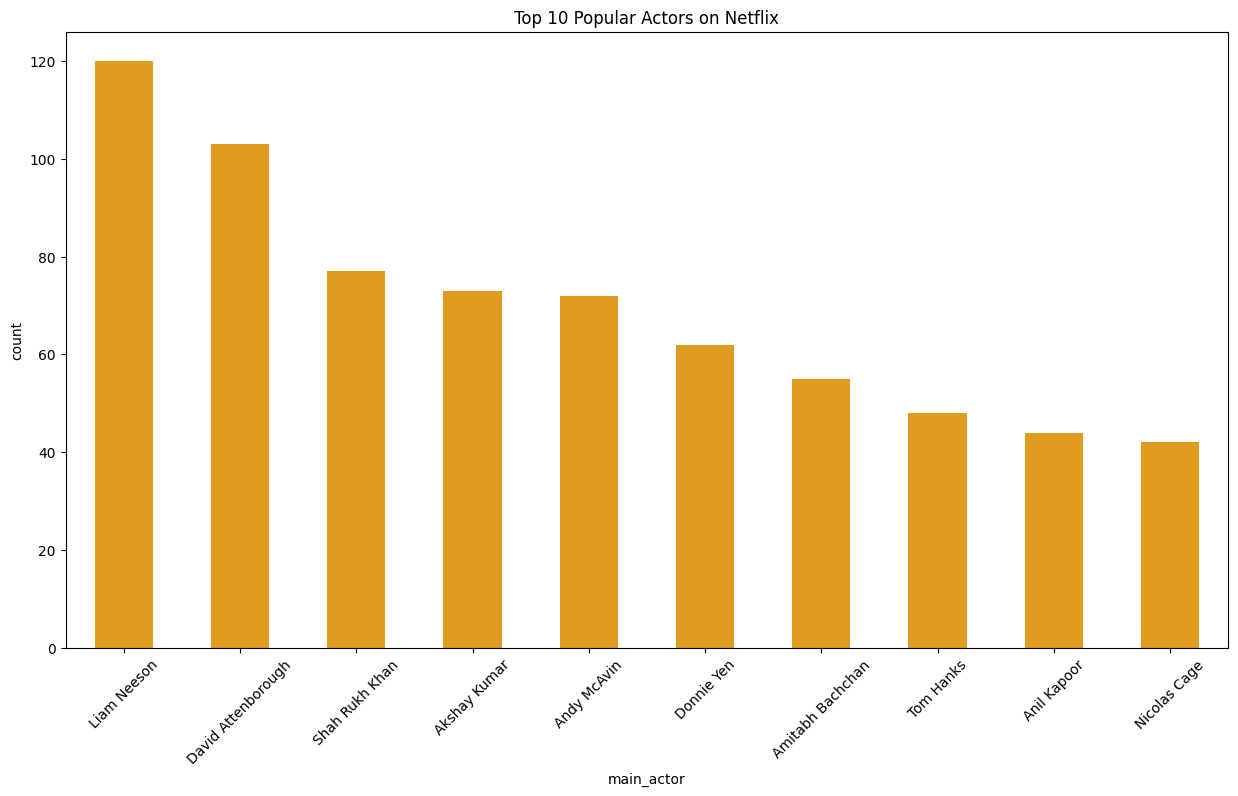

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_actors, x="main_actor", y="count",color='orange',width=0.5)
plt.width=0.5
plt.xlabel='Actor'
plt.ylabel='Number of Shows'
plt.title('Top 10 Popular Actors on Netflix')
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [ ]:
netflix_data.dtypes

show_id                 object
type                    object
title                   object
director                object
main_actor              object
country                 object
date_added      datetime64[ns]
release_year            object
rating                  object
duration                object
genre                   object
description             object
year_added               int32
month_added              int32
dtype: object

In [ ]:
netflix_data['year_added']=netflix_data['year_added'].astype('int64')
netflix_data['month_added']=netflix_data['month_added'].astype('int64')


In [ ]:
corr_data=netflix_data[['date_added','year_added','month_added']]
corr_data

,date_added,year_added,month_added
0,2021-09-25,2021,9
1,2021-09-24,2021,9
1,2021-09-24,2021,9
1,2021-09-24,2021,9
2,2021-09-24,2021,9
...,...,...,...
8805,2020-01-11,2020,1
8805,2020-01-11,2020,1
8806,2019-03-02,2019,3
8806,2019-03-02,2019,3


In [ ]:
corr_data.corr()

,date_added,year_added,month_added
date_added,1.000000,0.982798,0.030835
year_added,0.982798,1.000000,-0.153480
month_added,0.030835,-0.153480,1.000000


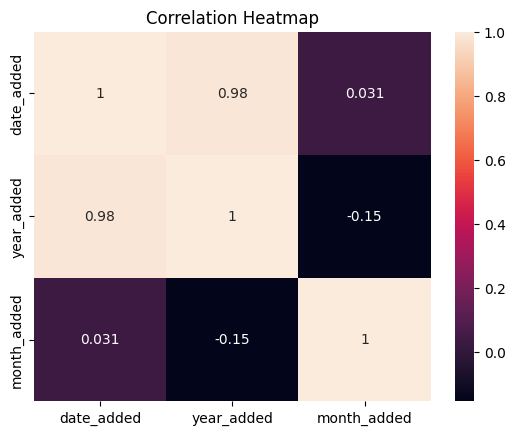

In [ ]:
#plt.subplots(figsize=(5,5))
sns.heatmap(corr_data.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

Obeservation : Above Heatmap shows correlation between release_year,year_added & month_added.

**Finding the best Month for releasing content?**

In [ ]:
# converting month number to month name
netflix_data['month_name'] = netflix_data['month_added'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
netflix_data.head(2)

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description,year_added,month_added,month_name
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Sep
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,Sep


In [ ]:
month_data=netflix_data['month_name'].value_counts().reset_index()
month_data

,month_name,count
0,July,2517
1,Dec,2368
2,Sep,2285
3,Apr,2279
4,Jan,2276
5,Oct,2266
6,Aug,2181
7,June,2113
8,Mar,2098
9,Nov,1970


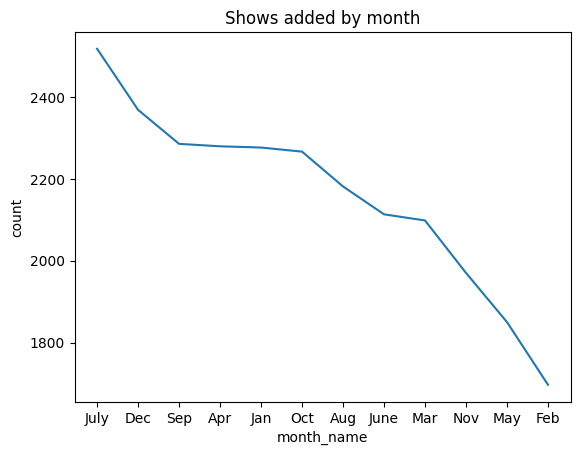

In [ ]:
# @title Count per month

sns.lineplot(data=month_data, x='month_name', y='count')
plt.title("Shows added by month")
plt.show()

Observation:

1.   Maximum shows were added in the month of July followed by December,October,January, April

2.   Content was added keeping holidays and festive seaons




In [ ]:
#Number of movies added on netflix after 2015
movie_data=netflix_original[(netflix_original['type'] == 'Movie' ) & (netflix_original['year_added'] >= 2015)].reset_index()
movie_data.head()
movie_data['type'].value_counts()

type
Movie    6086
Name: count, dtype: int64

Observation: Maximum number of movies were added on Netflix from the year 2015.

In [ ]:
netflix_data['country'].str.strip().value_counts()[:10]

country
United States     9289
India             2999
United Kingdom    1880
France            1042
Canada             980
Japan              828
South Korea        652
Spain              642
Germany            553
Mexico             437
Name: count, dtype: int64

In [ ]:
#country_wise movies
usa_data=netflix_data[netflix_data['country']=='United States'].reset_index()
usa_data=usa_data.groupby(['year_added']).aggregate({'title':'count'}).sort_values(by=['title'],ascending=False).reset_index()
usa_data

,year_added,title
0,2021,2114
1,2019,2113
2,2020,1907
3,2018,1464
4,2017,1066
5,2016,399
6,2015,129
7,2014,43
8,2013,23
9,2011,20


In [ ]:
india_data=netflix_data[netflix_data['country']=='India'].reset_index()
india_data=india_data.groupby(['year_added']).aggregate({'title':'count'}).sort_values(by=['title'],ascending=False).reset_index()
india_data

,year_added,title
0,2018,999
1,2019,618
2,2020,560
3,2017,449
4,2021,309
5,2016,64


In [ ]:
uk_data=netflix_data[netflix_data['country']=='United Kingdom'].reset_index()
uk_data=uk_data.groupby(['year_added']).aggregate({'title':'count'}).sort_values(by=['title'],ascending=False).reset_index()
uk_data

,year_added,title
0,2019,439
1,2020,356
2,2018,338
3,2017,326
4,2021,259
5,2016,125
6,2015,22
7,2011,6
8,2014,6
9,2013,3


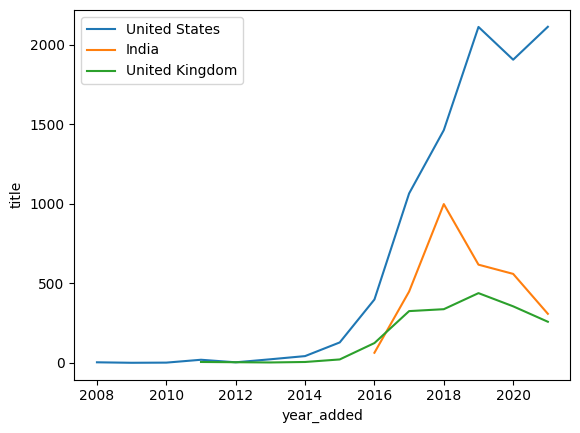

In [ ]:
plt.subplot(1,1,1)
sns.lineplot(x = 'year_added', y = 'title',  data = usa_data,label='United States')
sns.lineplot(x = 'year_added', y = 'title',  data = india_data,label='India')
sns.lineplot(x = 'year_added', y = 'title',  data = uk_data,label='United Kingdom')
plt.legend()
plt.show()


Observation: Content added in top three countries reached maximum in the year range 2018 to 2020 and there is a sudden dip after 2020 in all the three countries

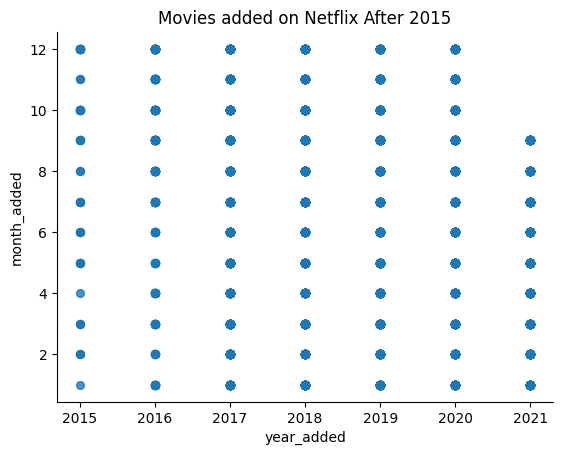

In [ ]:

movie_data.plot(kind='scatter', x='year_added', y='month_added', s=32, alpha=.8)
plt.title("Movies added on Netflix After 2015")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

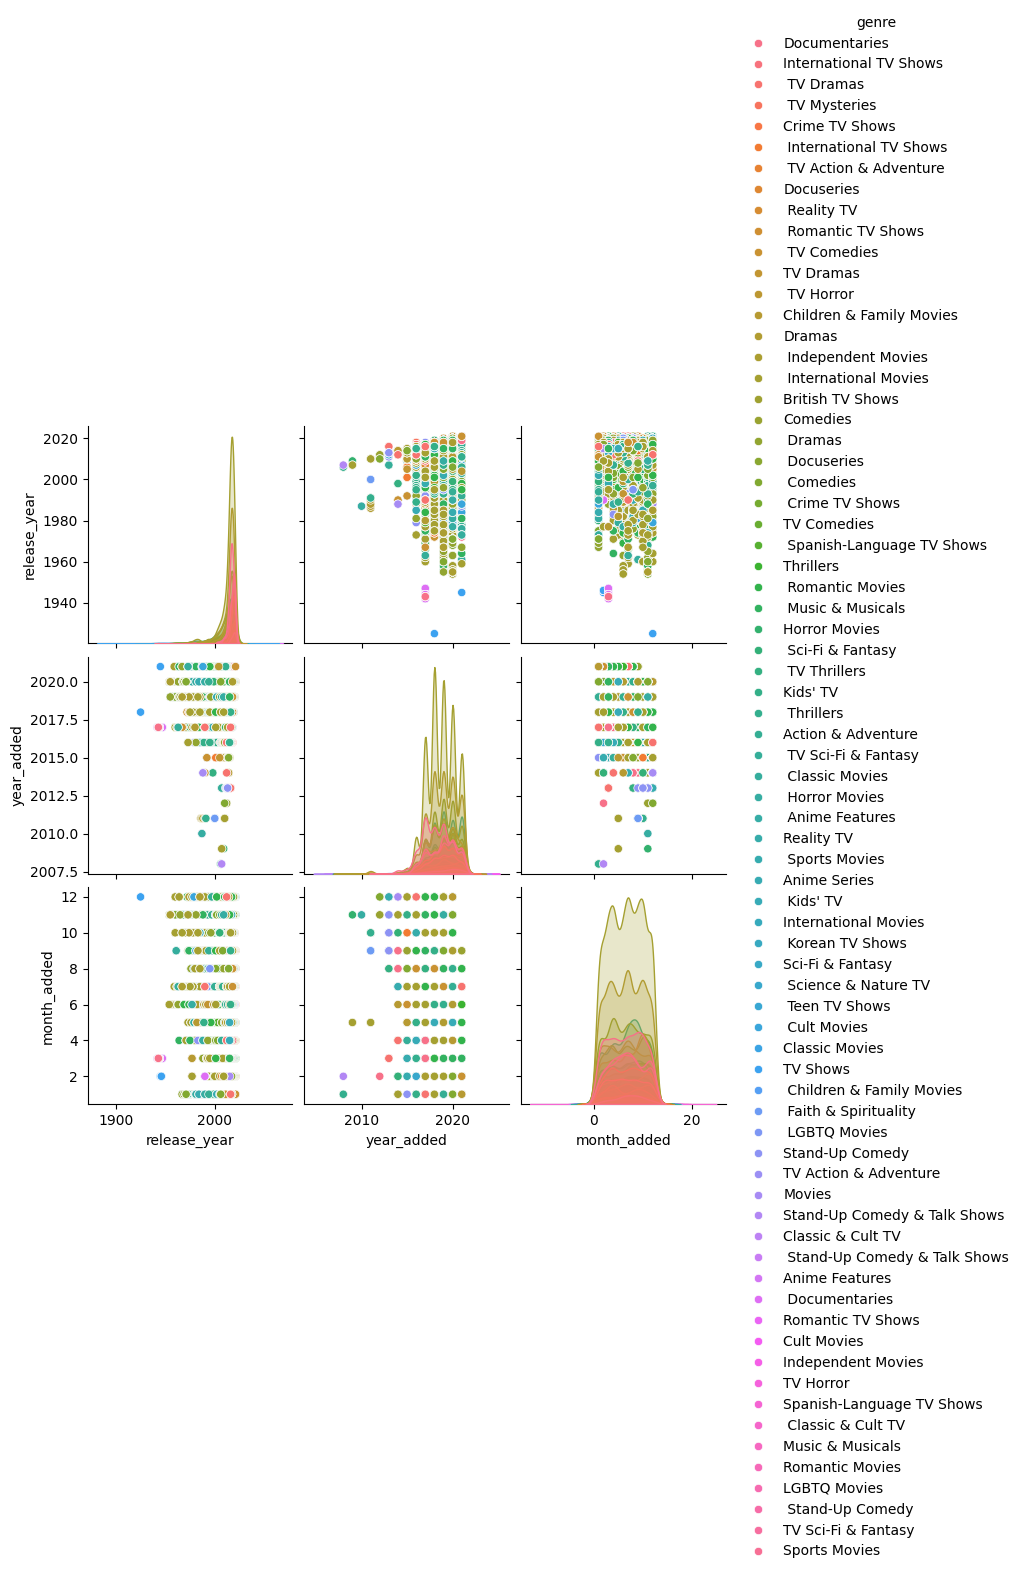

In [ ]:
sns.pairplot(data=netflix_data, hue='genre')
plt.show()

In [ ]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'main_actor', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'genre',
       'description', 'year_added', 'month_added', 'month_name'],
      dtype='object')

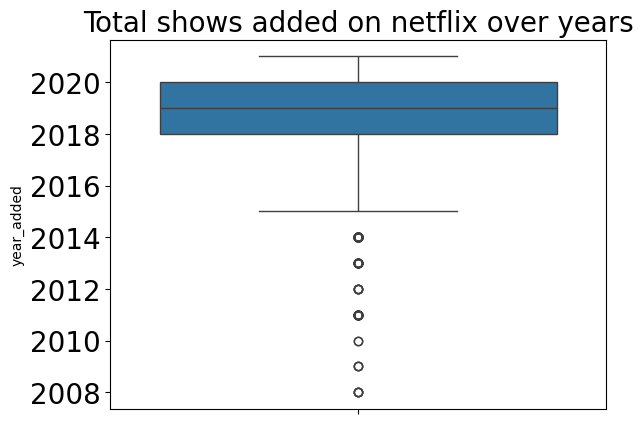

In [ ]:
#plt.figure(figsize=(15,10))
sns.boxplot(y = netflix_data["year_added"])
plt.yticks(fontsize=20)
plt.title('Total shows added on netflix over years', fontsize=20)
plt.show()

Conclusions
We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:


1.   The most content type on Netflix is movies
2.   The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly
3.The country by the amount of the produces content is the United States
4.The most popular director on Netflix , with the most titles, is Youssef Chahine.
5.International Movies is a genre that is mostly in Netflix.
6.The largest count of Netflix content is made with a “TV-MA” rating
7.The most popular actor on Netflix is Liam Neeson, followed by Shah Rukh Khan
8.Top rated content on Netflix belongs to 'TV-MA' followed by 'TV-14'
9.Maximum shows/titles are added in the month of July followed by December,October, Jan, April considering holidays and festive season
10.Top three countries content wise has a maximum in the years 2018 and 2020 and there is a sudden dip in the content added after 2020


Recommendations:

1.Content added  on Netflix is reducing after 2020.. to maintain the positive trend its highly recommended to add the content both in TV Shows and Movies.

2. Maximum content is to be added in the months of July,December, October, Jan, April to follow the same positive trend

3.As the popular content belongs to International Movies and Dramas, its highly recommended to add such content to increase the business.

4.Based on the popular rating analysis, target audience are Mature/R and TV-14. so its recommended to add such content.

5.Add content in the top rated countries like USA, India and UK to maintain the upward trend.

